In [1]:
import sys

print("--sys.version—-")
print(sys.version)

--sys.version—-
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# test environment

# Python version: 3.8.5
# Anaconda version: 4.9.2
 
# I recommend the (re)installation of anaconda in case of error.
# how to install: www.anaconda.com > product > individual edition > 3.8 version graphical installer download

In [3]:
# basic information

# the number of value presented
value_num = 13
value_label = {1:"가계부채", 2:"주택마련", 3:"소득양극화", 4:"청년일자리", 5:"전염병", 6:"개인정보유출", 7:"여성대상범죄",
               8:"악성댓글", 9:"미세먼지", 10:"방사능", 11:"플라스틱", 12:"지구온난화", 13:"재난사고"}
value_label_eng = {1:"Household\n Debt", 2:"Housing", 3:"Polarization", 4:"Employment", 5:"Infectious\n Disease", 6:"Privacy", 
                   7:"Misogyny\n Crime", 8:"Online\n Insults", 9:"Fine\n Dust", 10:"Radioactivity", 11:"Plastic", 12:"Global\n Warming", 
                   13:"Accidents"}
# the number of questions per respondent
HQ_num = 5

In [4]:
### Part 1: preprocessing raw.dta to wide-formatted data

In [5]:
import pandas as pd
import numpy as np
import math
import statistics

## raw.dta 파일을 pandas로 불러오기

# raw.dta가 있는 파일 위치 설정 및 불러오기
directory = r"C:\Users\Eehyun\Desktop\SK 데이터 변환"
raw = pd.read_stata("{}\\raw.dta".format(directory))

# np.nan을 ''으로 전처리
raw = raw.replace(np.nan, '', regex=True)

# data.frame을 list로 변환
data = [raw.columns.values.tolist()] + raw.values.tolist()

In [6]:
## raw.dta 파일을 pandas로 불러오기

# raw.dta가 있는 파일 위치 설정 및 불러오기
directory = r"C:\Users\문기홍\Dropbox\대학원\모듈서베이"
raw = pd.read_stata("{}\\raw.dta".format(directory))

In [7]:
raw

,NO,UID,START,END,TIME,SQ1,SQ2,HQ_AGE,SQ3,SQ4,...,C2_6_4,C2_7_4,C2_8_4,C2_9_4,C2_10_4,C3,C4,C5s1,C6,C7
0,1000000,C327029616_1-6-2-rjwswc9tt5nf67i9pqkr73dw,2020/12/01-17:40:21,2020/12/01-17:43:03,1899-12-31 00:02:42.001,1,25,2,4,4,...,NaN,NaN,NaN,NaN,NaN,2,1,3,5,5
1,1000001,C327029616_1-3-7-46c7k0xz98osz0rbijdr7mtw,2020/12/01-19:04:35,2020/12/01-19:07:10,1899-12-31 00:02:35.000,2,27,3,8,4,...,NaN,NaN,NaN,NaN,NaN,6,3,3,5,3
2,1000007,C327029616_1-6-10-gdv3lk0ushbnx5zb82qyipdr,2020/12/01-19:06:49,2020/12/01-19:08:47,1899-12-31 00:01:58.000,1,18,2,1,1,...,NaN,NaN,NaN,NaN,NaN,3,3,1,5,2
3,1000009,C327029616_1-6-10-qjbci2bdm9cnnd3v3f4egrl0,2020/12/01-19:06:50,2020/12/01-19:09:14,1899-12-31 00:02:24.000,1,23,2,2,5,...,NaN,NaN,NaN,NaN,NaN,3,2,3,5,5
4,1000008,C327029616_1-5-9-k3mtu16sjvulvnzqyavphgwx,2020/12/01-19:06:50,2020/12/01-19:09:23,1899-12-31 00:02:33.000,1,15,1,1,1,...,NaN,NaN,NaN,NaN,NaN,5,3,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2000029,C327029616_1-8-4-7zqtI0uHiHhqEdwYFzlbrPzX,2020/11/30-19:27:06,2020/11/30-19:32:07,1899-12-31 00:05:01.000,1,43,4,12,12,...,NaN,NaN,NaN,NaN,NaN,2,3,3,3,1
1006,2000035,C327029616_1-8-4-abBdWzNpgtBfFhMdUtSVq27L,2020/11/30-20:41:14,2020/11/30-20:47:01,1899-12-31 00:05:47.000,1,37,4,1,1,...,NaN,NaN,NaN,NaN,NaN,1,1,5,4,2
1007,2000053,C327029616_1-8-4-ay72zmivreqi70t0t060jy40,2020/12/01-08:35:06,2020/12/01-08:38:18,1899-12-31 00:03:12.000,1,41,4,9,9,...,NaN,NaN,NaN,NaN,NaN,6,1,2,2,1
1008,2000052,C327029616_1-8-4-I6sHY5higVJt6FH80gZK3pZa,2020/12/01-08:34:45,2020/12/01-08:41:43,1899-12-31 00:06:58.000,1,41,4,4,4,...,NaN,NaN,NaN,NaN,NaN,5,1,3,5,2


In [8]:
# np.nan을 ''으로 전처리
raw = raw.replace(np.nan, '', regex=True)

# data.frame을 list로 변환
data = [raw.columns.values.tolist()] + raw.values.tolist()

In [9]:
data[1010]

[2000058,
 'C327029616_1-8-4-yvtjc0vmcld8xermnvaauaqv',
 '2020/12/01-09:36:33',
 '2020/12/01-10:18:13',
 Timestamp('1899-12-31 00:41:40'),
 1,
 46,
 4,
 12,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 11,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 11,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 4,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 2.0,
 1.0,
 1.0,
 2.0,
 5.0,
 2.0,
 5.0,
 1.0,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 6,
 1,
 2,
 3,
 2]

In [9]:
## HQ 질문별로 변환하는 함수 (input: "HQ1_1c1")

def HQ_process(data, q_num):
    
    col_num = len(data[0])
    row_num = len(data) - 1
    
    # 왼쪽과 오른쪽에 표시된 항목을 각각 처리
    HQ_left = [x for x in range(col_num) if data[0][x].startswith("HQ{}_1".format(q_num))]
    HQ_right = [x for x in range(col_num) if data[0][x].startswith("HQ{}_2".format(q_num))]
    A = next(x for x in range(col_num) if data[0][x] == "A{}".format(q_num))
    
    for j in range(1, row_num+1):
        # 왼쪽과 오른쪽에 표시된 숫자의 column 이름을 가져오기(예: HQ1_1c1)
        num_left = next(data[0][x] for x in HQ_left if data[j][x] == 1)
        num_right = next(data[0][x] for x in HQ_right if data[j][x] == 1)
        
        # 번호만 추출(spliter: 'c')
        num_left = num_left.split('c')[1]
        num_right = num_right.split('c')[1]
        
        try:
            num_left = int(num_left)
            num_right = int(num_right)
            a = int(data[j][A])
            
        except (ValueError, IndexError):
            return -1
        
        # (예: A1)에 있는 수를 가공, 13보다 큰 경우 13을 빼기
        a = a if a <= value_num else a - value_num
        data[j].append(num_left)
        data[j].append(num_right)
        data[j].append(a)
        
        # redundant columns를 없애기
        HQ_remove = HQ_left + HQ_right
        del data[j][A]
        for index in sorted(HQ_remove, reverse=True):
            del data[j][index]
    
    # 제거한 값의 column 삭제
    del data[0][A]
    for index in sorted(HQ_remove, reverse=True):
        del data[0][index]
        
    data[0].append("HQ{}_L".format(q_num))
    data[0].append("HQ{}_R".format(q_num))
    data[0].append("A{}".format(q_num))

In [10]:
## HQ 변환 함수 실행(data에 inplace=True로 저장됨)

for i in range(1, HQ_num+1):
    HQ_process(data, i)

## OPTION: 변환한 결과(wide-form)를 csv 파일로 저장

import csv

output = open("{}\\converted_wide.csv".format(directory), 'w', encoding='utf-8', newline='')
wr = csv.writer(output)

for row in data:
    wr.writerow(row)

output.close()

In [11]:
## HQ1~5를 중심으로 wide-form 자료를 long-form 자료로 변환

def wide_to_long(data):
    
    row_num = len(data)
    data_t_index = list()

    # column name을 훑어 처리할 값의 index를 미리 준비
    for i in range(1, HQ_num+1):
        data_t_index.append(data[0].index("HQ{}_L".format(i)))
        data_t_index.append(data[0].index("HQ{}_R".format(i)))
        data_t_index.append(data[0].index("A{}".format(i)))

    # append할 리스트를 생성하고 column name을 추가
    data_t = list()
    data_t.append(data[0][:-15] + list(["order", "HQ_L", "HQ_R", "HQ_a", "HQ_b", "A"]))

    for i in range(1, row_num):
        data_pre = data[i][:-15]

        for j in range(1, HQ_num+1):
            HQ_L = data[i][data_t_index[j*3-3]]
            HQ_R = data[i][data_t_index[j*3-2]]
            A = data[i][data_t_index[j*3-1]]

            # 비교하는 A vs B 중 작은 값이 먼저 나오도록 추가로 저장
            HQ_small = HQ_L if HQ_L < HQ_R else HQ_R
            HQ_big = HQ_L if HQ_L > HQ_R else HQ_R
            
            data_t.append(data_pre + list([j, HQ_L, HQ_R, HQ_small, HQ_big, A]))
                
    return data_t

In [12]:
## long-format으로 전환한 다음 DataFrame으로 저장

data = wide_to_long(data)

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [13]:
### Part 2. 선택 비율에 따라 t-test 만들기

In [14]:
## 전처리: drop duplicated rows in case of consistent answer
# 동일한 질문을 받아 같은 값을 대답한 경우 하나만 남기고 제거

df = df.drop_duplicates(["NO", "HQ_a", "HQ_b", "A"], keep='first')

In [15]:
## 전처리: drop duplicated rows in case of inconsistent respondent
# 동일한 질문을 받아 다른 값을 대답한 경우 '신뢰할 수 없는 응답자'로 분류, 그의 모든 대답을 제거

drop_resp = set(df["NO"][df.duplicated(["NO", "HQ_a", "HQ_b"], keep=False)])

for r in drop_resp:
    df = df.drop(df[df.NO == r].index)

In [16]:
# t-test 결과를 저장하기 위해 간소화
df_abb = df[["NO", "HQ_a", "HQ_b", "A"]]

# tabulate한 결과를 새로운 DataFrame으로 저장(tab), tab_tmp는 전체 표본 수(n)을 얻기 위한 장치
tab = df_abb.groupby(["HQ_a", "HQ_b", "A"]).count().reset_index()
tab_tmp = df_abb[["NO", "HQ_a", "HQ_b"]].groupby(["HQ_a", "HQ_b"]).count().reset_index()

tab = pd.merge(tab, tab_tmp, on=["HQ_a", "HQ_b"])
tab.rename(columns = {"NO_x":"choice_a", "NO_y":"N"}, inplace=True)

In [17]:
## p-value를 수준에 따라 별로 변환하는 함수

def p_value_star(num):
    if num < 0.001:
        return "***"
    elif num < 0.01:
        return "**"
    elif num < 0.05:
        return "*"
    else:
        return ""

In [18]:
## tab에 필요한 통계값을 추가하기: A 선택 비율, 표준오차, Z값, p-value, 유의도

tab["choice_p"] = tab.apply(lambda r: r.choice_a / r.N * 100, axis=1)
tab["SE"] = tab.apply(lambda r: math.sqrt(0.5 * (1-0.5) / r.N), axis=1)
tab["Z"] = tab.apply(lambda r: (r.choice_p / 100 - 0.5) / r.SE, axis=1)
tab["P"] = tab.apply(lambda r: (1 - statistics.NormalDist().cdf(abs(r.Z))) * 2, axis=1)
tab["star"] = tab.apply(lambda r: p_value_star(r.P), axis=1)
tab.reset_index(drop=True, inplace=True)

In [19]:
# 모든 비교쌍에 대한 응답자들의 선택비율 정보를 표시
tab

,HQ_a,HQ_b,A,choice_a,N,choice_p,SE,Z,P,star
0,1,2,1,28,64,43.750000,0.062500,-1.000000,0.317311,
1,1,2,2,36,64,56.250000,0.062500,1.000000,0.317311,
2,1,3,1,24,62,38.709677,0.063500,-1.778002,0.075404,
3,1,3,3,38,62,61.290323,0.063500,1.778002,0.075404,
4,1,4,1,31,67,46.268657,0.061085,-0.610847,0.541301,
...,...,...,...,...,...,...,...,...,...,...
151,11,12,12,32,61,52.459016,0.064018,0.384111,0.700896,
152,11,13,11,34,62,54.838710,0.063500,0.762001,0.446060,
153,11,13,13,28,62,45.161290,0.063500,-0.762001,0.446060,
154,12,13,12,30,63,47.619048,0.062994,-0.377964,0.705457,


In [20]:
k = 9
tab[(tab['HQ_a'] == k) | (tab['HQ_b'] == k)][['HQ_a', "HQ_b", 'A', 'choice_a','N','choice_p']]
print(sum(tab[(tab['HQ_a'] == k) | (tab['HQ_b'] == k)]['N'])/2)
print(sum(tab[(tab['HQ_a'] == k) | (tab['HQ_b'] == k) & (tab['A'] == k)]['N'])/2)
print(sum(tab[(tab['HQ_a'] == k) | (tab['HQ_b'] == k) & (tab['A'] == k)]['N'])/sum(tab[(tab['HQ_a'] == k) | (tab['HQ_b'] == k)]['N']) )

778.0
517.5
0.6651670951156813


In [21]:
## 집단 수준에서 정리한 결과를 바탕으로 선택 비율 구하기
# (HQ_a, HQ_b) 조합이 unique하기 떄문에, HQ_a를 기준으로 비율을 합하기 위해 (HQ_b, HQ_a)를 추가함
# 예를 들어, (HQ_a, HQ_b, A):(1, 2, 1)이므로, (2, 1, 1)은 존재하지 않음. HQ_a를 기준으로 선택 비율의 평균을 구해야.

simple_p = tab.copy()
cols = simple_p.columns.tolist()

# simple_p_tmp가 (HQ_b, HQ_a) 순서를 바꾼 dataFrame
cols = ["HQ_b", "HQ_a"] + cols[2:] 
simple_p_tmp = simple_p[cols]
simple_p_tmp.rename(columns = {"HQ_b": "HQ_a", "HQ_a": "HQ_b"}, inplace=True)

frames = [simple_p, simple_p_tmp]
simple_p = pd.concat(frames)
simple_p.reset_index(inplace=True)

for index, row in simple_p.iterrows():
    if row["A"] != row["HQ_a"]:
        simple_p.at[index, "A"] = 0

In [22]:
# 선택 비율은 1 vs. 2, 1 vs. 3, ... 에서 각 비율의 평균값으로 구함
simple_p_tab = simple_p[["HQ_a", "A", "choice_p"]].groupby(["HQ_a", "A"]).mean().reset_index()
simple_p_tab.drop(simple_p_tab[simple_p_tab["A"] == 0].index, inplace=True)
simple_p_tab.drop(["A"], axis=1, inplace=True)
simple_p_tab = simple_p_tab.sort_values(["choice_p"], ascending=False).reset_index(drop=True)

In [23]:
# 각 항목의 전체적인 선택 비율을 표시
simple_p_tab

,HQ_a,choice_p
0,5,75.869290
1,3,63.969042
2,2,62.961561
3,4,55.044967
4,6,52.063241
5,1,51.583861
6,12,46.625234
7,7,43.900967
8,9,43.411701
9,11,43.024569


In [24]:
# 관계 중 유의한 것만 추려서 network로 그리기
tab_s = tab[(tab["Z"] > 0) & (tab["star"] != "")]

In [ ]:
tab_s

In [26]:
# 관계 중 유의하지 않은 것만 추려서 network로 그리기
tab_ss = tab[(tab["Z"] > 0) & (tab["star"] == "")]

In [ ]:
tab_ss

In [29]:
# (옵션) 필요한 경우에 csv 파일로 저장
tab.to_csv("{}\\t_test.csv".format(directory), sep=',', na_rep='.')
tab_s.to_csv("{}\\t_test_s.csv".format(directory), sep=',', na_rep='.')

In [25]:
import numpy
import matplotlib.pyplot as plt

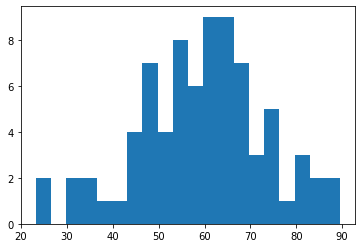

In [26]:
numpy.std(tab['choice_p'])
plt.hist(tab['choice_p'], bins=20)
plt.show()

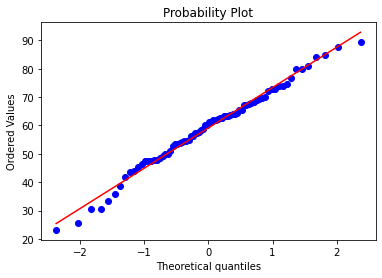

In [27]:
from scipy.stats import probplot
plt.figure()
probplot(tab['choice_p'], plot=plt)
plt.show()


In [28]:
from scipy import stats

stats.shapiro(tab['choice_p'])

ShapiroResult(statistic=0.9871895909309387, pvalue=0.6281048059463501)

In [31]:
### Part 3. t-test의 결과를 그래프로 그리기

In [41]:
## import: visualize tab_s relationship with networkx

%matplotlib inline

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [33]:
## 그래프의 node, edge 정보를 바탕으로 설정(input: DafaFrame, output: Graph)

def set_graph(tab_s):
    G = nx.DiGraph()

    # 노드 추가
    for i in range(1, value_num+1):
        G.add_node(i)

    # edge 추가(유의하게 선택 비율이 높은 가치 -> 낮은 가치)
    for index, row in tab_s.iterrows():
        if row["HQ_a"] == row["A"]:
            G.add_edge(row["HQ_a"], row["HQ_b"], weight=len(row["star"]))
        elif row["HQ_b"] == row["A"]:
            G.add_edge(row["HQ_b"], row["HQ_a"], weight=len(row["star"]))
    return G

In [34]:
def set_graph_rev(tab_s):
    G = nx.DiGraph()

    # 노드 추가
    for i in range(1, value_num+1):
        G.add_node(i)

    # edge 추가(유의하게 선택 비율이 낮은 가치 -> 높은 가치)
    for index, row in tab_s.iterrows():
        if row["HQ_b"] == row["A"]:
            G.add_edge(row["HQ_a"], row["HQ_b"], weight=len(row["star"]))
        elif row["HQ_a"] == row["A"]:
            G.add_edge(row["HQ_b"], row["HQ_a"], weight=len(row["star"]))
    return G

In [35]:
## 그래프의 outdegree를 바탕으로 각 노드의 위치(x, y 좌표)를 계산하기

def get_position(degree, value_num, jitter=5):

    tmp = list()
    tmp_set = list()
    
    # from dict to list
    for key, value in degree.items():
        tmp.append([key, value])
        if value not in tmp_set:
            tmp_set.append(value)
    
    # [7, 5, 1] -> [3, 2, 1] 순서로 변환(x 좌표)
    tmp_set = sorted(tmp_set, reverse=True)
    
    for i in range(value_num):
        tmp[i][1] = tmp_set.index(tmp[i][1])
    
    # 중복되는 값이 겹치지 않도록 y좌표 배정
    for i in range(value_num):
        order = 1
        dup = 0
        for j in range(value_num):
            if tmp[i][1] == tmp[j][1]:
                dup += 1
        for k in range(i+1, value_num):
            if tmp[i][1] == tmp[k][1]:
                order += 1
        tmp[i].append((dup-order+1)/(dup+1))
        tmp[i].append(jitter/dup)
    return tmp

In [36]:
## set_graph()로 설정한 그래프를 그리기
## outdegree 기준

def draw_graph(G, title="Preference between Social Values", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=[v for v in degree.values()],
                           nodelist=degree.keys(), node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [37]:
## choice_p : 선택 비율 기준

def draw_graph2(G, title="Preference between Social Values", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [38]:
## 레이아웃 변경. pos
## 선택 비율 기준
def draw_graph3(G, title="Preference between Social Values", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = nx.shell_layout(G)
   
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [39]:
# 선택비율 기준
# value num 대신 value label

def draw_graph4(G, title="Preference between Social Values", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=600)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, value_label_eng, font_color='black', font_size=5)
    
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

G = set_graph(tab_s)
draw_graph(G)

# 만일 결과를 저장하고자 할 경우,
# draw_graph(G, save_option=True)

#out degree 기준
G= set_graph_rev(tab_s)
draw_graph(G)

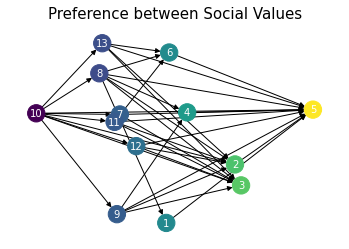

<Figure size 3600x3000 with 0 Axes>

In [28]:
#선택 비율 기준
# 유의한 경우
G = set_graph_rev(tab_s)
draw_graph2(G,x_axis=simple_p_tab, save_option=True)

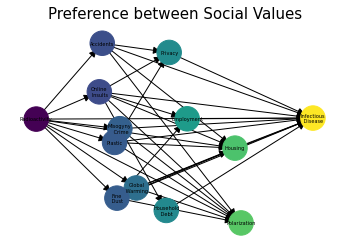

<Figure size 3600x3000 with 0 Axes>

In [29]:
#선택 비율 기준
# 유의한 경우
G = set_graph_rev(tab_s)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

G= set_graph_rev(tab_ss)
draw_graph(G)

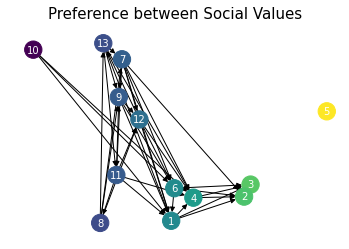

<Figure size 3600x3000 with 0 Axes>

In [36]:
#선택비율 기준
#유의하지 않은 경우
G = set_graph_rev(tab_ss)
draw_graph2(G,x_axis=simple_p_tab, save_option=True)

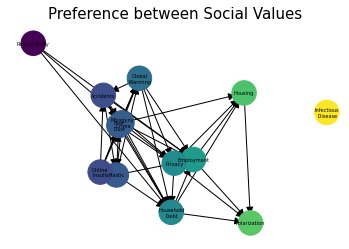

<Figure size 3600x3000 with 0 Axes>

In [30]:
#선택비율 기준
#유의하지 않은 경우
G = set_graph_rev(tab_ss)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

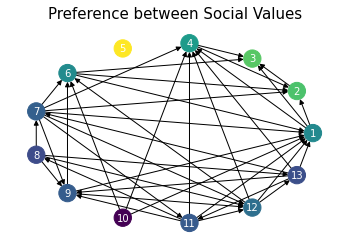

<Figure size 3600x3000 with 0 Axes>

In [27]:
## 선택 비율 기준
## 유의하지 않은 경우

G = set_graph_rev(tab_ss)
draw_graph3(G)

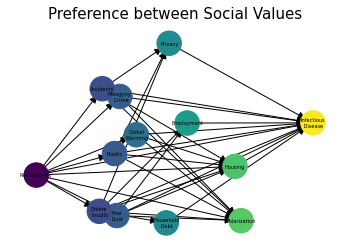

<Figure size 3600x3000 with 0 Axes>

In [80]:
G = set_graph_rev(tab_s)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

G = set_graph(tab_s2)
draw_graph(G, save_option=True)

G = set_graph(tab_ss)
draw_graph(G)

G = set_graph(tab_ss2)
draw_graph(G, save_option=True)

In [ ]:
### Part 3-1. 간소화된 그래프 그리기

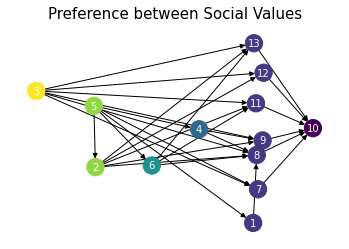

<Figure size 3600x3000 with 0 Axes>

In [40]:
# abbreviated version of graph above
# for example: if A > B and B > C and A > C => then, remove A > C edge

G_abb = G.copy()

for n in G.nodes():
    for child in G.successors(n):
        for grand_child in G.successors(child):
            if G_abb.has_edge(n, grand_child):
                G_abb.remove_edge(n, grand_child)
                
draw_graph(G_abb)

In [ ]:
### Part 4. 로지스틱 회귀 분석 실행 후 그래프로 결과 그리기

In [25]:
# 로지스틱 회귀 모델 임포트
import statsmodels.api as sm

In [26]:
# raw DataFrame을 필요한 변수 중심으로 정리
df.rename(columns = {"SQ1": "gender", "SQ2": "age", "C1": "marital", "C3": "income", "C4": "educ", "C5s1": "partylr", "C6": "religion", "C7": "house"}, inplace=True)
drop_list = [x for x in df.columns if x.startswith("B") or x.startswith("C") or x.startswith("SQ") or x.startswith("AGR")]

df_a = df.drop(drop_list, axis=1)
df_a = df_a.drop(["UID", "START", "END", "TIME"], axis=1)

#미혼/ 기혼, 이혼및사별
df_a['marital2'] = df_a['marital']
df_a.loc[df_a['marital2']==4, 'marital2'] = 3 

#무교및기타/ 개신교, 천주교, 불교
df_a['religion2'] = df_a.apply(lambda x : x['religion']+1 , axis = 1)
df_a.loc[(df_a['religion2']==5)|(df_a['religion2']==6), 'religion2'] = 1 

#오피스텔또는고시원/ 단독주택, 연립다세대, 아파트, 비주거용 주택 및 기타
df_a['house2'] = df_a.apply(lambda x : x['house']+1 , axis = 1)
df_a.loc[df_a['house2']==6, 'house2'] = 1
df_a.loc[df_a['house2']==7, 'house2'] = 5 

df_a['marital'] = df_a['marital2']
df_a['religion'] = df_a['religion2']
df_a['house'] = df_a['house2']

# 전처리: income의 9. 소득 없음을 0으로 처리
df_a["income"].values[df_a["income"] == 9] = 0
df_a = df_a.sort_values(by=["HQ_a", "HQ_b", "A"], axis=0)

In [27]:
df_a

,NO,gender,age,HQ_AGE,marital,income,educ,partylr,religion,house,order,HQ_L,HQ_R,HQ_a,HQ_b,A,marital2,religion2,house2
55,1000014,1,32,3,1,3,3,4,1,4,1,1,2,1,2,1,1,1,4
212,1000020,1,18,2,1,3,3,3,1,4,3,1,2,1,2,1,1,1,4
257,1000083,1,20,2,1,3,3,3,1,4,3,1,2,1,2,1,1,1,4
293,1000093,2,18,2,1,4,2,4,2,3,4,1,2,1,2,1,1,2,3
680,1000187,2,32,3,3,8,4,2,2,4,1,2,1,1,2,1,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,1001038,1,13,1,1,2,3,2,1,4,5,13,12,12,13,13,1,1,4
4167,1001059,1,25,2,2,4,2,3,4,4,3,13,12,12,13,13,2,4,4
4402,1001120,1,21,2,1,6,4,3,1,2,3,12,13,12,13,13,1,1,2
4465,1001139,1,45,4,2,7,3,3,3,4,1,12,13,12,13,13,2,3,4


In [146]:
## 로지스틱 회귀 분석 실행 후 결과 리턴

def logistic_reg(i, j, df_a):
    small_df = df_a.loc[(df["HQ_a"] == i) & (df_a["HQ_b"] == j)]
    small_df["A"].values[small_df["A"] == i] = 1
    small_df["A"].values[small_df["A"] == j] = 0

    res = list()
    model = sm.GLM.from_formula("A ~  gender + age + income + educ + partylr + C(religion) + C(marital) + C(house)", family = sm.families.Binomial(), data=small_df)
    result = model.fit()
    range_n = len(result.params.keys())

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, j, i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [147]:
## 가능한 모든 조합(예: 1 vs. 2)에 대해 로지스틱 회귀 분석 실행
res_all = list()

for i in range(1, value_num+1):
    for j in range(i+1, value_num+1):
        res_all.extend(logistic_reg(i, j, df_a))

res_df = pd.DataFrame(res_all)
res_df.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anac

In [152]:
res_df[(res_df["star"] != "")]

,HQ_a,HQ_b,A,variable,coef,p_value,star
19,1,3,1,C(marital)[T.3],-5.949675,0.041519,*
20,1,3,1,C(house)[T.2],-8.537071,0.005649,**
24,1,3,1,age,0.206999,0.011488,*
27,1,3,1,partylr,1.860652,0.008379,**
43,1,4,1,partylr,1.101423,0.026649,*
...,...,...,...,...,...,...,...
924,7,13,7,gender,-3.174842,0.007340,**
984,8,12,8,educ,-0.899928,0.024721,*
997,8,13,8,age,-0.093342,0.030069,*
1012,9,10,9,gender,1.853773,0.045366,*


In [153]:
## 위의 res_df와 달리, 선택 비율의 차이가 유의하지 않은 경우만 따로 저장

tab_ns = tab[(tab["Z"] > 0) & (tab["star"] == "")]

In [154]:
## 선택 비율 차이가 유의하지 않은 가치들 사이에서 로지스틱 회귀 분석 실행

res_ns = list()

for index, row in tab_ns.iterrows():
    res_ns.extend(logistic_reg(row["HQ_a"], row["HQ_b"], df_a))

# 분석한 결과를 DataFrame으로 저장 후 조작, 결과가 유의한 경우만 남기기
res_df_ns = pd.DataFrame(res_ns)
res_df_ns.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]
res_df_ns = res_df_ns[res_df_ns["star"] != ""]

res_tab = pd.DataFrame(res_df_ns.groupby(["HQ_a", "HQ_b"])["variable"].agg(lambda x: ' '.join(x)))
res_tab.reset_index(inplace=True)

C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


In [ ]:
res_df_ns

In [158]:
## 로지스틱 회귀 분석 실행 후 결과 리턴(특정 경우 vs 그 외 모든 경우에 대한 비율)

def logistic_reg2(i, df_a):
    small_df = df_a.loc[(df_a["HQ_a"] == i)|(df_a["HQ_b"] == i)]
    small_df["A"].values[small_df["A"] != i] = 0
    small_df["A"].values[small_df["A"] == i] = 1
    
    res = list()
    model = sm.GLM.from_formula("A ~  gender + age + income + educ + partylr + C(religion) + C(marital) + C(house)"
                                , family = sm.families.Binomial(), data=small_df)
    
    result = model.fit()
    range_n = len(result.params.keys())

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, "all_others", i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [159]:
## 특정 경우 vs 그 외 모든 경우에 대한 비율
res_all = list()

for i in range(1, value_num+1):
        res_all.extend(logistic_reg2(i, df_a))

res_df2 = pd.DataFrame(res_all)
res_df2.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

In [41]:
i = 13

small_df = df_a.loc[(df_a["HQ_a"] == i)|(df_a["HQ_b"] == i)]
small_df["A"].values[small_df["A"] != i] = 0
small_df["A"].values[small_df["A"] == i] = 1
    
res = list()
model = sm.Logit.from_formula("A ~  gender + age + income + educ + partylr + C(religion) + C(marital) + C(house)"
                              ,  data=small_df)
    
result2 = model.fit()
range_n = len(result2.params.keys())
for k in range(1, range_n):
    if result2.pvalues[k] < 0.05:
        print (result2.pvalues[k])
print('hello')
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.656118
         Iterations 5
0.0002569026833459347
0.0002263750700686453
hello
                           Logit Regression Results                           
Dep. Variable:                      A   No. Observations:                  740
Model:                          Logit   Df Residuals:                      725
Method:                           MLE   Df Model:                           14
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                 0.02892
Time:                        00:01:31   Log-Likelihood:                -485.53
converged:                       True   LL-Null:                       -499.99
Covariance Type:            nonrobust   LLR p-value:                   0.01072
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2668      0.608     -0.

In [161]:
res_df2[(res_df2["star"] != "")]

,HQ_a,HQ_b,A,variable,coef,p_value,star
11,1,all_others,1,gender,0.561535,2.386032e-04,***
12,1,all_others,1,age,0.022354,8.405929e-03,**
15,1,all_others,1,partylr,0.338318,6.759500e-04,***
22,2,all_others,2,C(house)[T.2],-0.966404,4.912409e-02,*
28,2,all_others,2,age,-0.020965,1.293335e-02,*
33,3,all_others,3,C(religion)[T.3],-0.734499,8.897405e-03,**
44,3,all_others,3,age,0.021124,1.650170e-02,*
45,3,all_others,3,income,0.100596,2.617849e-02,*
48,4,all_others,4,C(religion)[T.2],0.470200,2.591611e-02,*
51,4,all_others,4,C(marital)[T.2],-0.599746,5.150202e-03,**


In [165]:
value_group = {1:'소득 및 주거 불안', 2:'소득 및 주거 불안', 3:'소득 및 주거 불안', 4:'노동 불안정', 5:'안전 위협', 6:'안전 위협', 7:'안전 위협', 8:'안전 위협', 9:'환경오염과 기후변화', 10:'환경오염과 기후변화', 11:'환경오염과 기후변화', 12:'환경오염과 기후변화', 13:'안전 위협'}

In [166]:
## 로지스틱 회귀 분석 실행 후 결과 리턴(특정조합vs모든조합에 대한 비율 그래프)
def logistic_reg3(i, df_a):
    group_sub = ['소득 및 주거 불안', '환경오염과 기후변화', '노동 불안정', '안전 위협']
    
    df_a_tag = df_a.copy()
    df_a_tag['HQ_a'] = df_a_tag['HQ_a'].replace(value_group)
    df_a_tag['HQ_b'] = df_a_tag['HQ_b'].replace(value_group)
    df_a_tag['A'] = df_a_tag['A'].replace(value_group)
    
    small_df = df_a_tag.loc[(df_a_tag["HQ_a"] == i)|(df_a_tag["HQ_b"] == i)]
    small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
    small_df = small_df.loc[small_df['drop']==0, :]
    
    small_df["A"].values[small_df["A"] != i] = 0
    small_df["A"].values[small_df["A"] == i] = 1
   
    res = list()
    model = sm.GLM.from_formula("A ~  gender + age + income + educ + partylr + C(religion) + C(marital) + C(house)"
                                , family = sm.families.Binomial(), data=small_df)
    
    result = model.fit()
    range_n = len(result.params.keys())
    group_sub.remove(i)
    all_others = group_sub[0:]

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, all_others, i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [167]:
## 특정조합vs모든조합에 대한 비율 그래프group = ['소득 및 주거 불안', '환경오염과 기후변화', '노동 불안정', '안전 위협']
res_all = list()
group = ['소득 및 주거 불안', '환경오염과 기후변화', '노동 불안정', '안전 위협']
for i in group:
        res_all.extend(logistic_reg3(i, df_a))

res_df3 = pd.DataFrame(res_all)
res_df3.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

<ipython-input-166-2c3c7b16e3db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
<ipython-input-166-2c3c7b16e3db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
<ipython-input-166-2c3c7b16e3db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [168]:
res_df3[(res_df3["star"] != "")]

,HQ_a,HQ_b,A,variable,coef,p_value,star
11,소득 및 주거 불안,"[환경오염과 기후변화, 노동 불안정, 안전 위협]",소득 및 주거 불안,gender,-0.419732,0.000019,***
13,소득 및 주거 불안,"[환경오염과 기후변화, 노동 불안정, 안전 위협]",소득 및 주거 불안,income,-0.073240,0.008304,**
15,소득 및 주거 불안,"[환경오염과 기후변화, 노동 불안정, 안전 위협]",소득 및 주거 불안,partylr,-0.144955,0.019041,*
19,환경오염과 기후변화,"[소득 및 주거 불안, 노동 불안정, 안전 위협]",환경오염과 기후변화,C(marital)[T.2],-0.377807,0.001731,**
22,환경오염과 기후변화,"[소득 및 주거 불안, 노동 불안정, 안전 위협]",환경오염과 기후변화,C(house)[T.2],-0.469974,0.042205,*
27,환경오염과 기후변화,"[소득 및 주거 불안, 노동 불안정, 안전 위협]",환경오염과 기후변화,gender,0.194029,0.027996,*
32,노동 불안정,"[소득 및 주거 불안, 환경오염과 기후변화, 안전 위협]",노동 불안정,C(religion)[T.2],-0.470200,0.025916,*
35,노동 불안정,"[소득 및 주거 불안, 환경오염과 기후변화, 안전 위협]",노동 불안정,C(marital)[T.2],0.599746,0.005150,**
37,노동 불안정,"[소득 및 주거 불안, 환경오염과 기후변화, 안전 위협]",노동 불안정,C(marital)[T.5],0.618796,0.047629,*
42,노동 불안정,"[소득 및 주거 불안, 환경오염과 기후변화, 안전 위협]",노동 불안정,C(house)[T.7],0.618796,0.047629,*


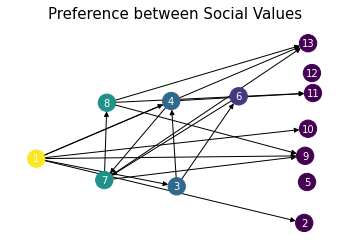

<Figure size 3600x3000 with 0 Axes>

In [79]:
# NOTE: python network does not provide nice graphical tools; Otherwise, Graphviz or Gephi can be an alternative.

# 외부 창으로 그래프를 보려면 inline 대신 tk를 옵션으로
#%matplotlib tk

G = set_graph(res_df_ns)

# basic version
draw_graph(G)

# 선택 비율에 따라 x 좌표 설정
#draw_graph(G, x_axis=simple_p_tab)

# edge에 유의한 변수명을 라벨로 붙인 경우
#labels={(row["HQ_a"], row["HQ_b"]):row["variable"] for index, row in res_tab.iterrows()}
#draw_graph(G, labels=labels)

#draw_graph(G, labels=labels, x_axis=simple_p_tab)

labels={(row["HQ_a"], row["HQ_b"]):row["variable"] for index, row in res_tab.iterrows()}
draw_graph(G, labels=labels)

draw_graph(G, labels=labels, x_axis=simple_p_tab)

In [83]:
simple_p_tab

,HQ_a,choice_p
0,5,75.869290
1,3,63.969042
2,2,62.961561
3,4,55.044967
4,6,52.063241
5,1,51.583861
6,12,46.625234
7,7,43.900967
8,9,43.411701
9,11,43.024569


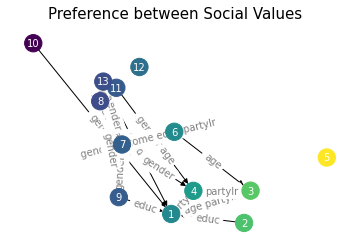

<Figure size 3600x3000 with 0 Axes>

In [37]:
G = set_graph_rev(res_df_ns)
labels={(row["HQ_a"], row["HQ_b"]):row["variable"] for index, row in res_tab.iterrows()}
draw_graph2(G, labels=labels, x_axis=simple_p_tab, save_option=True)

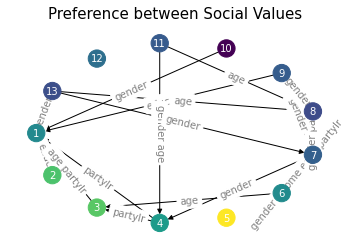

<Figure size 3600x3000 with 0 Axes>

In [71]:
G = set_graph_rev(res_df_ns)
labels={(row["HQ_a"], row["HQ_b"]):row["variable"] for index, row in res_tab.iterrows()}
dg3(G, labels=labels, x_axis=simple_p_tab)

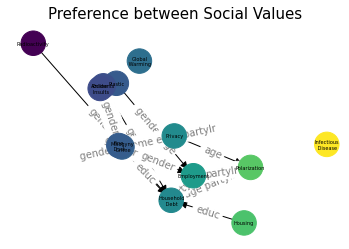

<Figure size 3600x3000 with 0 Axes>

In [37]:
G = set_graph_rev(res_df_ns)
labels={(row["HQ_a"], row["HQ_b"]):row["variable"] for index, row in res_tab.iterrows()}
draw_graph4(G, labels=labels, x_axis=simple_p_tab, save_option=True)

In [101]:
324/743

0.4360699865410498